Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

First 5 rows:
   fixed acidity  volatile acidity  citri

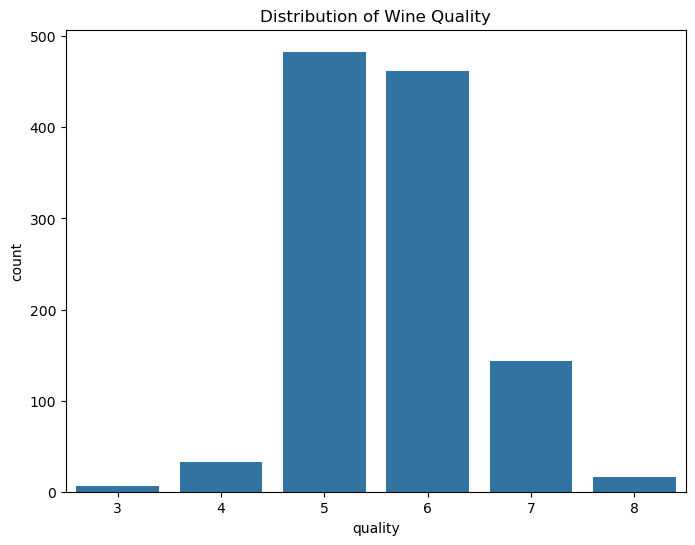

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv("F:/Oasis Infobyte_internship/wine_quality/WineQT.csv")

# Data Exploration
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of wine quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

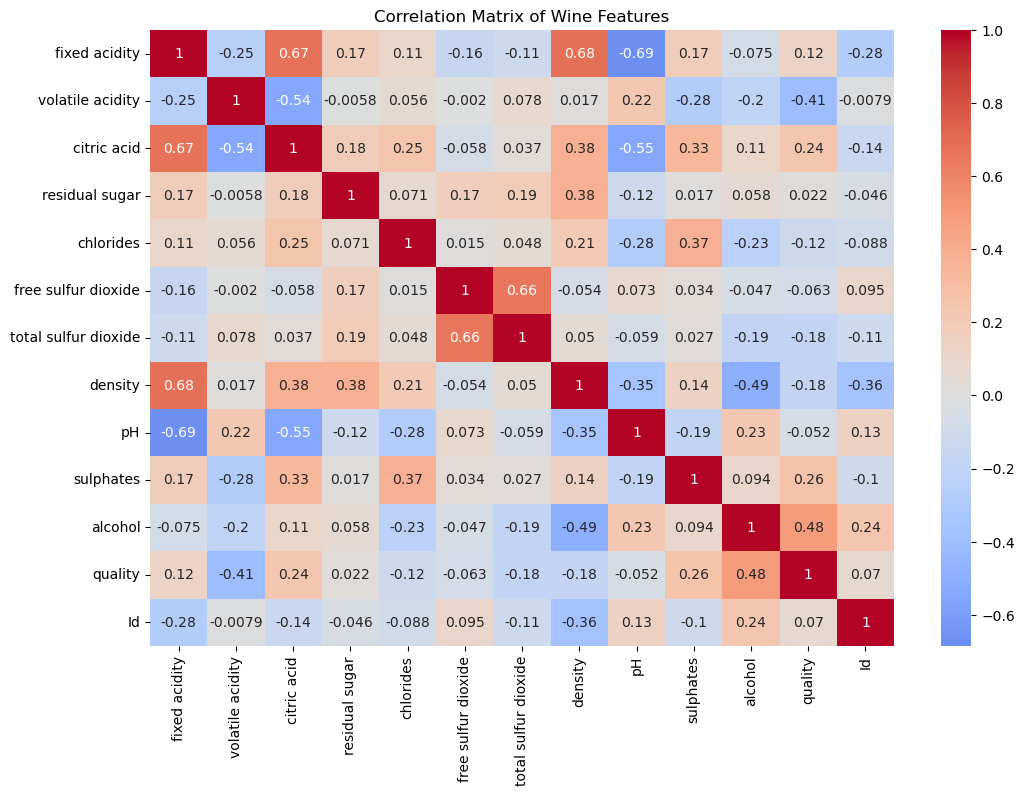

In [4]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [6]:
# Prepare data for modeling
X = df.drop(['quality', 'Id'], axis=1)  # Features
y = df['quality']  # Target variable

# Convert quality to binary classification (good/bad) for simplicity
# Let's consider wines with quality >= 5 as good (1) and <6 as bad (0)
y = y.apply(lambda x: 1 if x >= 5 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    
    return accuracy_score(y_test, y_pred)

In [8]:
# Model 1: Random Forest Classifier
print("\nRandom Forest Classifier:")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_accuracy = evaluate_model(rf, X_test, y_test)


Random Forest Classifier:
Confusion Matrix:
[[  0   6]
 [  0 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.99       223

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

Accuracy Score: 0.9737991266375546


C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Model 2: Stochastic Gradient Descent Classifier
print("\nStochastic Gradient Descent Classifier:")
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
sgd_accuracy = evaluate_model(sgd, X_test, y_test)


Stochastic Gradient Descent Classifier:
Confusion Matrix:
[[  0   6]
 [  0 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.99       223

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

Accuracy Score: 0.9737991266375546


C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Model 3: Support Vector Classifier
print("\nSupport Vector Classifier:")
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_accuracy = evaluate_model(svc, X_test, y_test)


Support Vector Classifier:
Confusion Matrix:
[[  0   6]
 [  0 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.99       223

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

Accuracy Score: 0.9737991266375546


C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


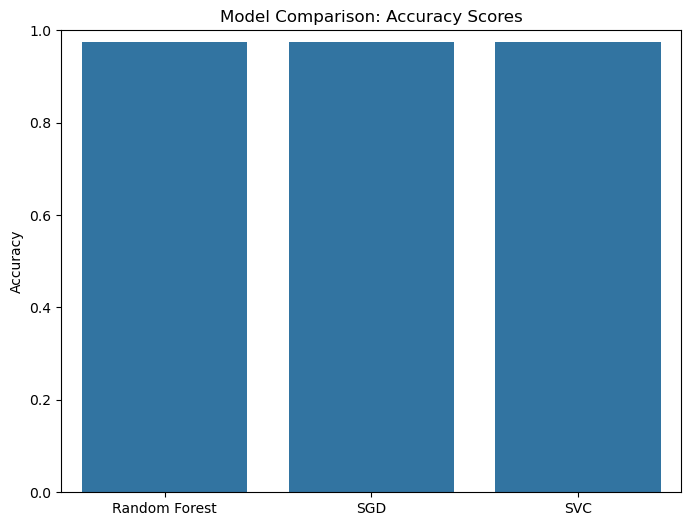

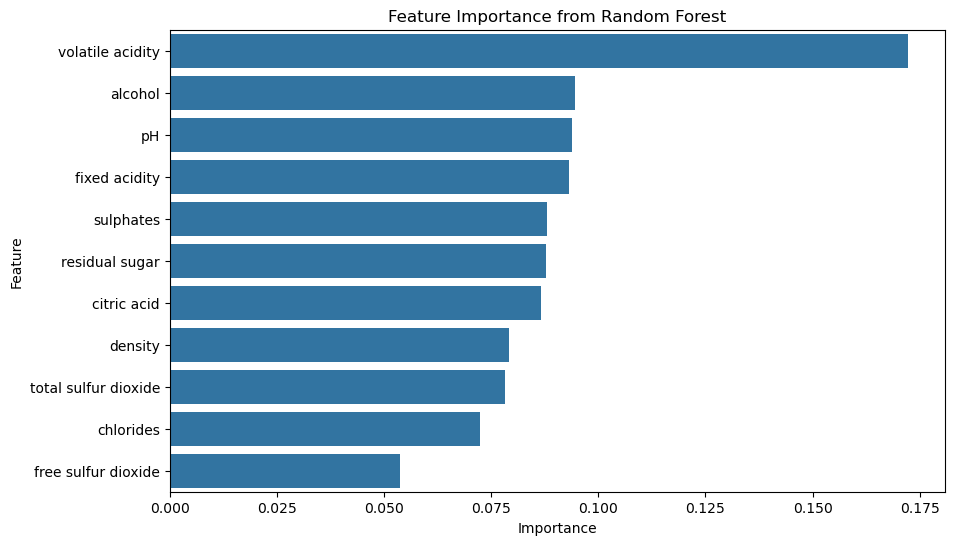

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Confusion Matrix:
[[  0   6]
 [  0 223]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.99       223

    accuracy                           0.97       229
   macro avg       0.49      0.50      0.49       229
weighted avg       0.95      0.97      0.96       229

Accuracy Score: 0.9737991266375546


C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\midoo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Compare model performances
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [rf_accuracy, sgd_accuracy, svc_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': df.drop(['quality', 'Id'], axis=1).columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.show()

# Hyperparameter tuning for the best model (Random Forest in this case)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                          param_grid=param_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=2)

grid_search.fit(X_train, y_train)

print("\nBest Parameters for Random Forest:")
print(grid_search.best_params_)

best_rf = grid_search.best_estimator_
best_rf_accuracy = evaluate_model(best_rf, X_test, y_test)